In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
df.corr()

,CustomerID,Age,pendapatan,pengeluaran
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
pendapatan,0.977548,-0.012398,1.000000,0.009903
pengeluaran,0.013835,-0.327227,0.009903,1.000000


In [48]:
df = df.rename(columns={"Annual Income (k$)":"pendapatan", "Spending Score (1-100)":"pengeluaran"})
df.head(3)

,CustomerID,Gender,Age,pendapatan,pengeluaran
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## K-Means Clustering

In [49]:
points = df[['pendapatan','pengeluaran']]
points = points.values

In [50]:
model = KMeans(n_clusters=5)
model.fit(points)

KMeans(n_clusters=5)

In [51]:
y = model.fit_predict(points)
print(y)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 0 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


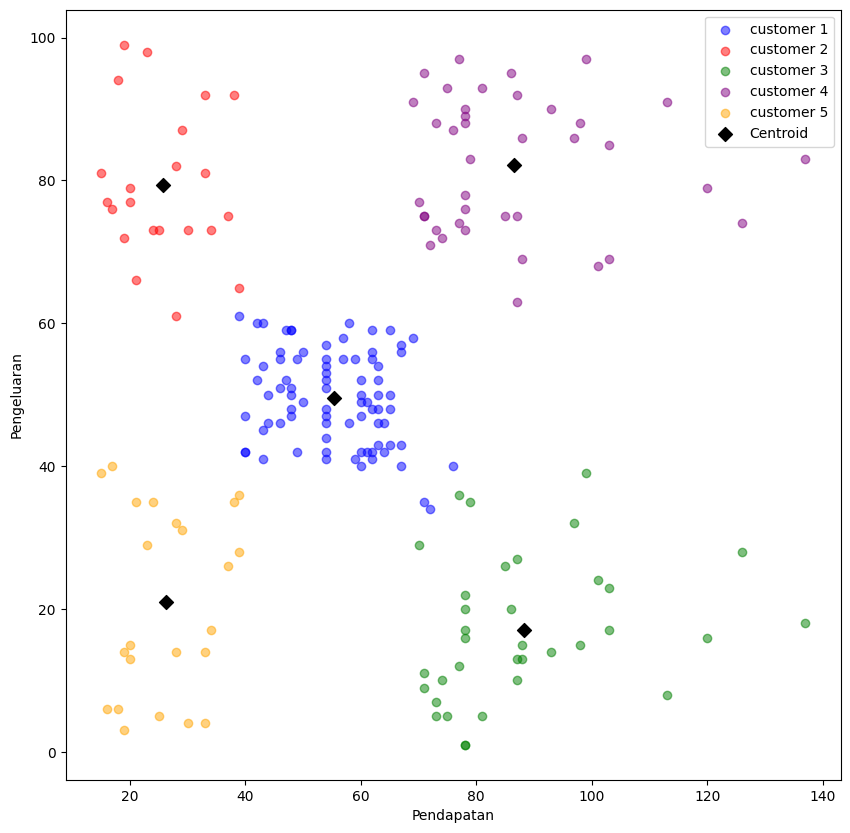

In [52]:
# xs = points.iloc[:,0]
# ys = points.iloc[:,1]

centroids = model.cluster_centers_

centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize=(10,10))
plt.scatter(points[y==0,0], points[y==0,1], c='blue', label='customer 1', alpha=0.5)
plt.scatter(points[y==1,0], points[y==1,1], c='red', label='customer 2', alpha=0.5)
plt.scatter(points[y==2,0], points[y==2,1], c='green', label='customer 3', alpha=0.5)
plt.scatter(points[y==3,0], points[y==3,1], c='purple', label='customer 4', alpha=0.5)
plt.scatter(points[y==4,0], points[y==4,1], c='orange', label='customer 5', alpha=0.5)


plt.scatter(centroid_x, centroid_y, marker="D", s=50, label="Centroid", c='black')
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.legend()
plt.show()

In [27]:
cluster = range(1,7)
inertias = []

for n in cluster:
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

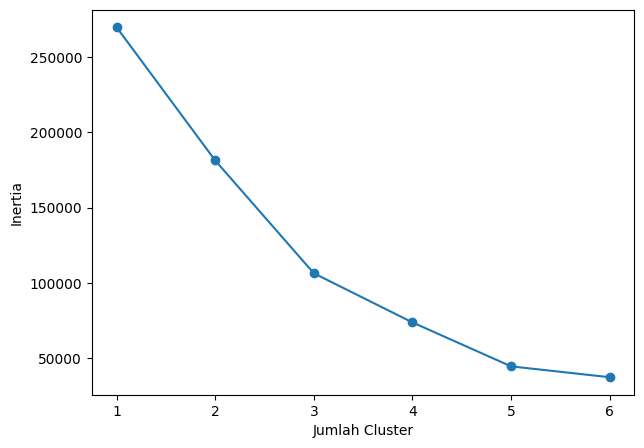

In [31]:
plt.figure(figsize = (7,5))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.xticks(cluster)
plt.show()

## Hierarchical Clustering

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [69]:
linkage_hr = linkage(points, method='ward')
complete_hr = complete(points)

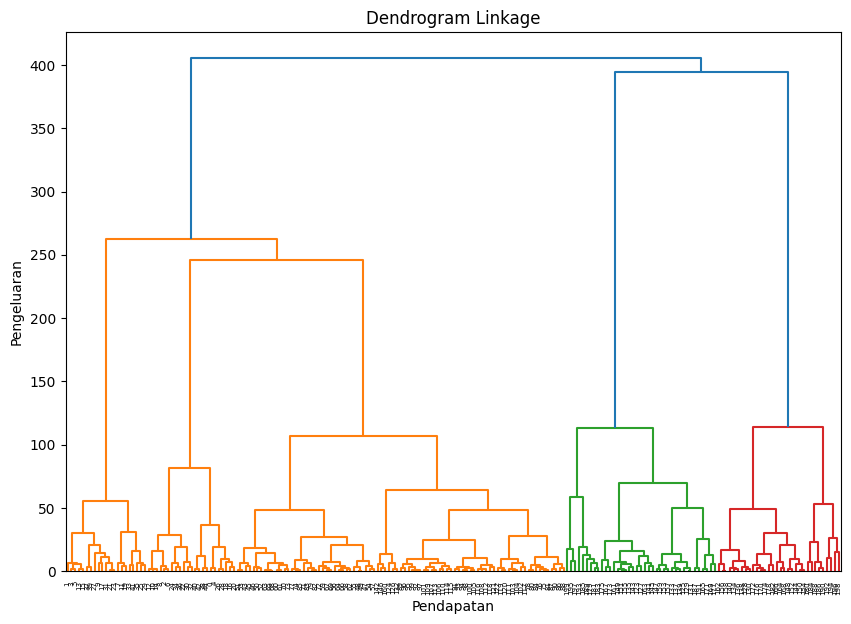

In [55]:
plt.figure(figsize=(10,7))
dendrogram(linkage_hr)
plt.title("Dendrogram Linkage")
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.show()

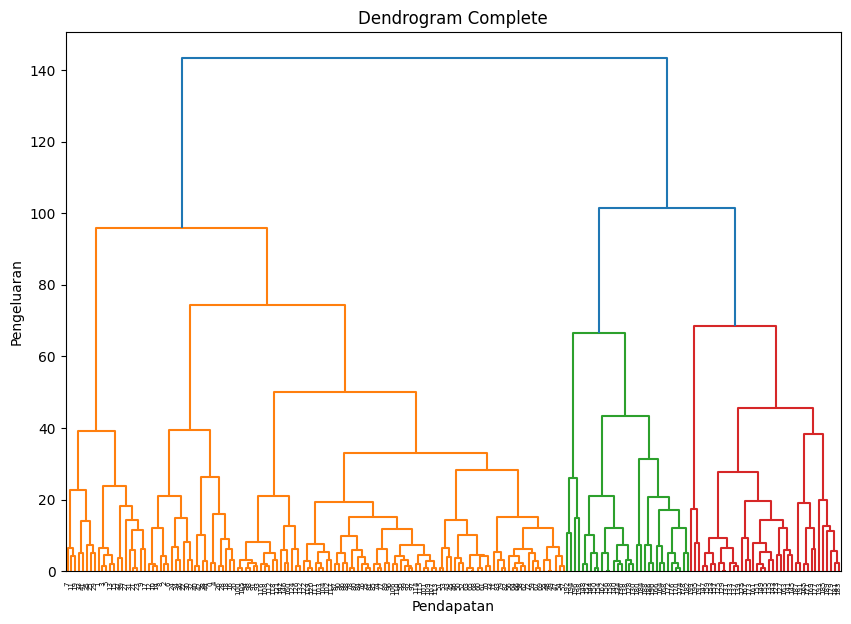

In [66]:
plt.figure(figsize=(10,7))
dendrogram(complete_hr)
plt.title("Dendrogram Complete")
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
hr_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [58]:
hr_predict = hr_cluster.fit_predict(points)

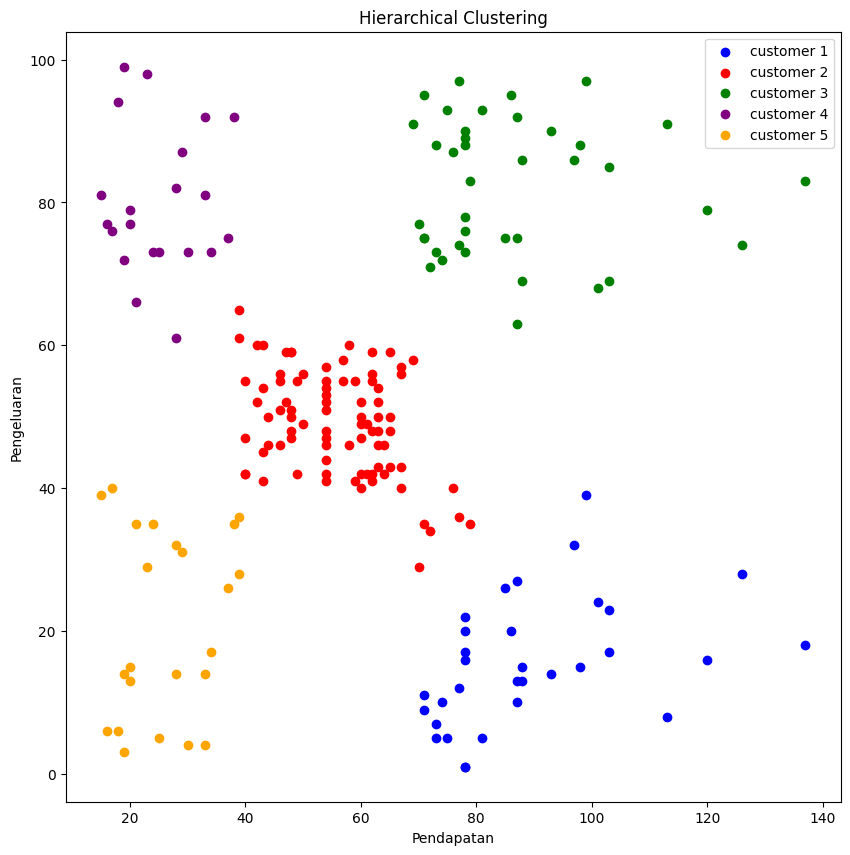

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(points[hr_predict==0,0], points[hr_predict==0,1], c='blue', label='customer 1')
plt.scatter(points[hr_predict==1,0], points[hr_predict==1,1], c='red', label='customer 2')
plt.scatter(points[hr_predict==2,0], points[hr_predict==2,1], c='green', label='customer 3')
plt.scatter(points[hr_predict==3,0], points[hr_predict==3,1], c='purple', label='customer 4')
plt.scatter(points[hr_predict==4,0], points[hr_predict==4,1], c='orange', label='customer 5')

plt.title("Hierarchical Clustering")
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.legend()
plt.show()